In [2]:
import os, sys

print("Working dir:" + os.getcwd())
print("Python version:" + sys.version)

Working dir:/Users/kin/Library/Mobile Documents/com~apple~CloudDocs/Year 4/AI/Coursework
Python version:3.9.18 (main, Jan 16 2024, 15:38:36) 
[Clang 14.0.0 (clang-1400.0.29.202)]


In [4]:
from copy import deepcopy
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import lines

In [5]:
import networkx as nx

print("networkx version: " + nx.__version__)

networkx version: 3.2.1


In [6]:
from ipywidgets import interact
import ipywidgets as widgets
from IPython.display import display

print("ipywidgets version: " + widgets.__version__)

ipywidgets version: 8.1.5


In [7]:
AIMA_TOOLBOX_ROOT = "/Users/kin/Library/Mobile Documents/com~apple~CloudDocs/Year 4/AI/Lab/lab_week2 /aima-python-uofg_v20212022a"
sys.path.append(AIMA_TOOLBOX_ROOT)

In [8]:
from search import *
from notebookutils import psource, heatmap, gaussian_kernel, show_map, final_path_colors, display_visual, plot_NQueens
# Needed to hide warnings in the matplotlib sections
import warnings

warnings.filterwarnings("ignore")



In [57]:
# import random
# from mazelib import Maze
# from mazelib.generate.Prims import Prims

# N = 10
# m = Maze()
# m.generator = Prims(int(N / 2), int(N / 2))
# m.generate()
# m.generate_entrances(True, True)
#
#
# start_row, start_col = m.start
# goal_row, goal_col = m.end
#
# m.grid[start_row][start_col] = 0
# m.grid[goal_row][goal_col] = 0
#
# print(m)


###########
#   # # # #
### # # # #
S         E
####### ###
# #       #
# # # #####
#   #     #
### # # ###
#   # #   #
###########


In [58]:
# num_teleports = 2
# teleport_links = []
#
# for _ in range(num_teleports):
#     x1, y1 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
#     x2, y2 = random.choice(range(len(m.grid))), random.choice(range(len(m.grid[0])))
#     teleport_links.append(((x1, y1), (x2, y2)))
#
# print("Teleportation Links:", teleport_links)

Teleportation Links: [((7, 6), (1, 7)), ((10, 2), (8, 7))]


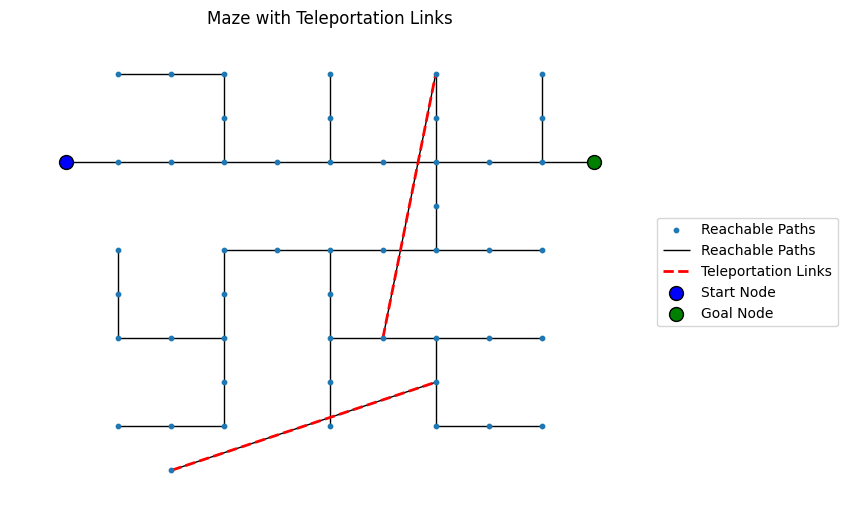

In [59]:
# def visualise_maze_with_teleports(maze, teleport_links):
#     rows, cols = len(maze.grid), len(maze.grid[0])
#     G = nx.Graph()
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 G.add_node((r, c))
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 if r > 0 and maze.grid[r - 1][c] == 0:
#                     G.add_edge((r, c), (r - 1, c))
#                 if c > 0 and maze.grid[r][c - 1] == 0:
#                     G.add_edge((r, c), (r, c - 1))
#
#     for (src, dest) in teleport_links:
#         G.add_edge(src, dest, color='red', style='dashed')
#
#     pos = {(r, c): (c, -r) for r, c in G.nodes()}
#     nx.draw(G, pos, with_labels=False, node_size=10, edge_color='black', label='Reachable Paths')
#
#     teleport_edges = [(src, dest) for (src, dest) in teleport_links]
#     nx.draw_networkx_edges(G, pos, edgelist=teleport_edges, edge_color='red', style='dashed', width=2, label='Teleportation Links')
#
#     start_node = m.start
#     goal_node = m.end
#     if start_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='blue', label='Start Node', node_size=100, edgecolors='black')
#     if goal_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[goal_node], node_color='green', label='Goal Node', node_size=100, edgecolors='black')
#
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.title("Maze with Teleportation Links")
#     plt.show()
#
# visualise_maze_with_teleports(m, teleport_links)

In [67]:
import heapq

def astar_search(maze, start, goal, teleport_links):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: manhattan_distance(start, goal)}

    steps = 0

    while open_set:
        _, current = heapq.heappop(open_set)
        steps += 1

        if current == goal:
            return reconstruct_path(came_from, current), steps

        for neighbor in get_neighbors(maze, current, teleport_links):
            tentative_g_score = g_score[current] + 1
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + manhattan_distance(neighbor, goal)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return None, steps

def manhattan_distance(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def get_neighbors(maze, current, teleport_links):
    neighbors = []
    rows, cols = len(maze.grid), len(maze.grid[0])
    r, c = current

    directions = [(0, 1), (0, -1), (1, 0), (-1, 0)]
    for dr, dc in directions:
        nr, nc = r + dr, c + dc
        if 0 <= nr < rows and 0 <= nc < cols and maze.grid[nr][nc] == 0:
            neighbors.append((nr, nc))

    for (src, dest) in teleport_links:
        if src == current:
            neighbors.append(dest)
    return neighbors

def reconstruct_path(came_from, current):
    path = [current]
    while current in came_from:
        current = came_from[current]
        path.append(current)
    path.reverse()
    return path

# path = astar_search(m, m.start, m.end, teleport_links)
# print("Path found by A* search:", path)


Number of steps taken by A* search: 11


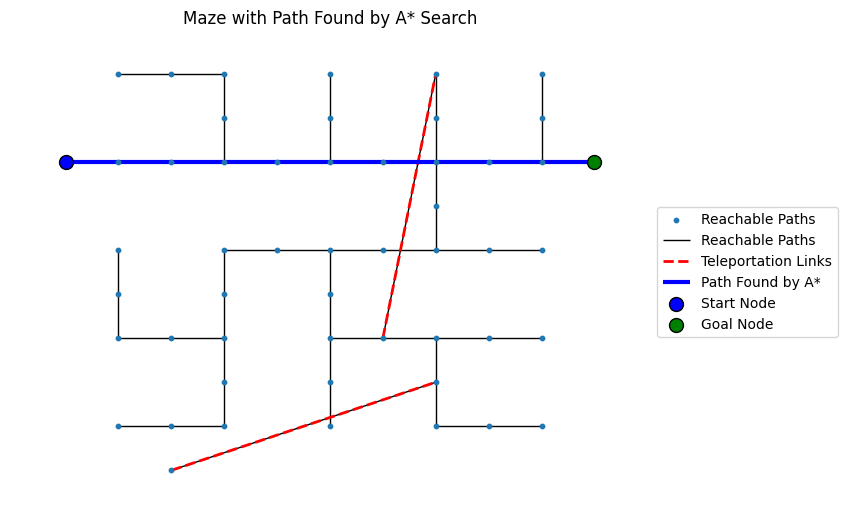

In [61]:
# import matplotlib.pyplot as plt
# import networkx as nx
#
# def visualise_maze_with_path(maze, teleport_links, path):
#     rows, cols = len(maze.grid), len(maze.grid[0])
#     G = nx.Graph()
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 G.add_node((r, c))
#
#     for r in range(rows):
#         for c in range(cols):
#             if maze.grid[r][c] == 0:
#                 if r > 0 and maze.grid[r - 1][c] == 0:
#                     G.add_edge((r, c), (r - 1, c))
#                 if c > 0 and maze.grid[r][c - 1] == 0:
#                     G.add_edge((r, c), (r, c - 1))
#
#     for (src, dest) in teleport_links:
#         G.add_edge(src, dest, color='red', style='dashed')
#
#     pos = {(r, c): (c, -r) for r, c in G.nodes()}
#     nx.draw(G, pos, with_labels=False, node_size=10, edge_color='black', label='Reachable Paths')
#
#     teleport_edges = [(src, dest) for (src, dest) in teleport_links]
#     nx.draw_networkx_edges(G, pos, edgelist=teleport_edges, edge_color='red', style='dashed', width=2, label='Teleportation Links')
#
#     if path:
#         path_edges = [(path[i], path[i + 1]) for i in range(len(path) - 1)]
#         nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='blue', width=3, label='Path Found by A*')
#
#     start_node = maze.start
#     goal_node = maze.end
#     if start_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[start_node], node_color='blue', label='Start Node', node_size=100, edgecolors='black')
#     if goal_node in G.nodes():
#         nx.draw_networkx_nodes(G, pos, nodelist=[goal_node], node_color='green', label='Goal Node', node_size=100, edgecolors='black')
#
#     print(f"Number of steps taken by A* search: {steps}")
#
#     plt.title("Maze with Path Found by A* Search")
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.show()
#
# path, steps = astar_search(m, m.start, m.end, teleport_links)
# visualise_maze_with_path(m, teleport_links, path)


Number of steps for maze size 10: 59
Number of steps for maze size 15: 99
Number of steps for maze size 20: 204
Number of steps for maze size 25: 294
Number of steps for maze size 30: 462


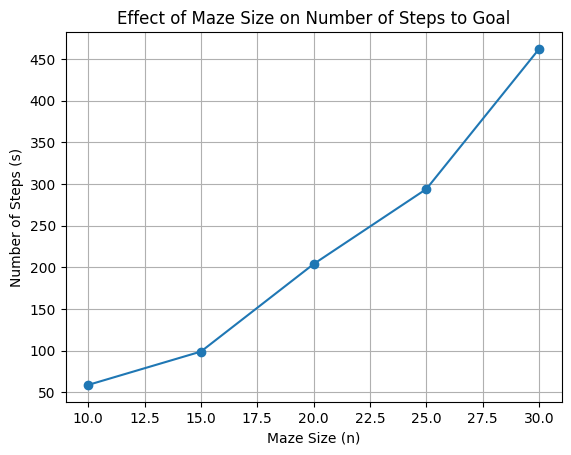

In [70]:
import random
from mazelib import Maze
from mazelib.generate.Prims import Prims
import matplotlib.pyplot as plt

maze_sizes = [10, 15, 20, 25, 30]
steps_list = []

for N in maze_sizes:
    try:
        m = Maze()
        m.generator = Prims(int(N / 2), int(N / 2))
        m.generate()
        m.generate_entrances(True, True)

        teleport_links = []
        num_teleports = 5
        rows, cols = len(m.grid), len(m.grid[0])

        for _ in range(num_teleports):
            valid_link = False
            while not valid_link:
                x1, y1 = random.choice(range(rows)), random.choice(range(cols))
                x2, y2 = random.choice(range(rows)), random.choice(range(cols))
                if m.grid[x1][y1] == 0 and m.grid[x2][y2] == 0 and (x1, y1) != (x2, y2):
                    teleport_links.append(((x1, y1), (x2, y2)))
                    valid_link = True

        path, steps = astar_search(m, m.start, m.end, teleport_links)
        steps_list.append(steps)

        print(f"Number of steps for maze size {N}: {steps}")

    except Exception as e:
        print(f"Error with maze size {N}: {e}")
        steps_list.append(-1)

if len(steps_list) == len(maze_sizes):
    plt.plot(maze_sizes, steps_list, marker='o')
    plt.xlabel('Maze Size (n)')
    plt.ylabel('Number of Steps (s)')
    plt.title('Effect of Maze Size on Number of Steps to Goal')
    plt.grid(True)
    plt.show()
else:
    print("Mismatch between maze sizes and steps list, check for errors in the loop.")
